In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
df = pd.read_csv('NYC_energy.csv')
df.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [5]:
# How many different companies are represented in the dataset?
len(df['Company Name'].unique())

439

In [6]:
# How many unique email domains are represented in the dataset?
emails = df.dropna(subset=['company email'])
len(emails['company email'].apply(lambda x : x.split('@')[-1]).unique())

361

In [7]:
# How many jobs were created in businesses in Queens?
jobs = df.dropna(subset=['Job created'])
jobs[jobs['City'] == 'Queens']['Job created'].sum()

90.0

In [8]:
nta = df['NTA'].dropna().unique()
output_df = pd.DataFrame(columns=['NTA', 'Average Total Savings Per Business', 'Average Jobs Created Per Business'])
for i in nta :
    nta_biz = df[df['NTA'] == i]
    if len(nta_biz['Company Name'].unique()) >= 5 :
        # Average savings per business in each NTA
        savings = int(nta_biz['Total Savings'].mean())
        # Average of jobs created per business in each NTA
        jobs_avg = nta_biz['Job created'].mean()
        if not np.isnan(jobs_avg) : jobs_avg = int(jobs_avg)
        # Append results to new df
        output_df = output_df.append({'NTA':i, 'Average Total Savings Per Business':savings, 'Average Jobs Created Per Business':jobs_avg}, ignore_index=True)
display(output_df)
output_df.to_csv('out.csv', index=False)

,NTA,Average Total Savings Per Business,Average Jobs Created Per Business
0,SoHo-TriBeCa-Civic Center-Little Italy,37214,NaN
1,Battery Park City-Lower Manhattan,469890,NaN
2,Sunset Park West,14316,NaN
3,Hunters Point-Sunnyside-West Maspeth,23931,NaN
4,College Point,17159,2
5,Carroll Gardens-Columbia Street-Red Hook,24337,NaN
6,Steinway,11227,20
7,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950,NaN
8,Hunts Point,39246,12
9,Bushwick South,26140,10


Text(0, 0.5, 'Jobs created')

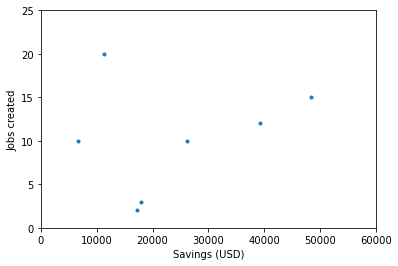

In [9]:
plt.plot(output_df['Average Total Savings Per Business'],output_df['Average Jobs Created Per Business'],'.')
plt.xlim(0,60000)
plt.ylim(0,25)
plt.xlabel('Savings (USD)')
plt.ylabel('Jobs created')

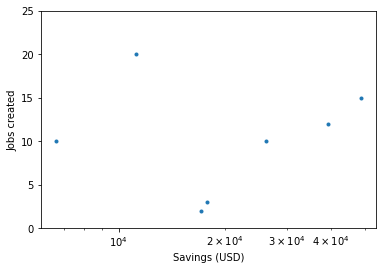

In [10]:
plt.plot(output_df['Average Total Savings Per Business'],output_df['Average Jobs Created Per Business'],'.')
#plt.xlim(0,60000)
plt.ylim(0,25)
plt.xlabel('Savings (USD)')
plt.ylabel('Jobs created')
plt.xscale("log")

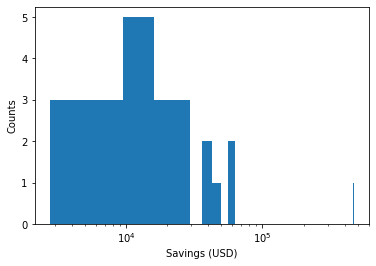

In [11]:
plt.hist(output_df['Average Total Savings Per Business'], bins=70)
plt.xlabel("Savings (USD)")
plt.ylabel("Counts")
plt.xscale("log")

In [12]:
jobs['Effective Date'] = pd.to_datetime(jobs['Effective Date'])
jobs = jobs.sort_values(by='Effective Date')
jobs['Effective Date']

/var/folders/_7/q2lzb96j67q_4byhw1438h1m0000gn/T/ipykernel_30943/220198945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs['Effective Date'] = pd.to_datetime(jobs['Effective Date'])


414   1993-02-05
29    2004-03-05
120   2005-02-03
137   2006-03-01
353   2007-04-10
324   2007-05-02
432   2007-06-08
37    2007-06-28
433   2007-07-02
95    2007-11-06
445   2008-12-09
Name: Effective Date, dtype: datetime64[ns]

Text(0, 0.5, 'Jobs created (cumulative)')

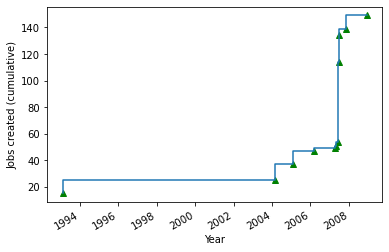

In [13]:
fig = plt.figure()
plt.step(jobs['Effective Date'], np.cumsum(jobs['Job created']),'g^')
plt.step(jobs['Effective Date'], np.cumsum(jobs['Job created']),'-')
fig.autofmt_xdate()
plt.xlabel('Year')
plt.ylabel('Jobs created (cumulative)')